In [13]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc  # https://docs.scipy.org/doc/scipy/reference/constants.html

# Variables
g   = 0 # Coupling strength
k_A = 0
m_A = 1 # A Mass
k_B = 0
m_b = 1 # B Mass
w_0A = np.sqrt(k_A/m_A)
w_0B = np.sqrt(k_B/m_A)


def EigenfreqClassic(k_A, K_B, m_A, m_B, g):
    w_A = np.sqrt((k_A+g)/m_A)
    w_B = np.sqrt((k_B+g)/m_B)
    
    t = np.sqrt(g/m_A)*np.sqrt(g/m_B)
    b = np.sqrt(w_A*w_B)
    gamma = t / b
    
    w_P = 0.5*(w_A**2+w_B**2+np.sqrt((w_A**2-w_B**2)**2+4*gamma*w_A*w_B))
    w_M = 0.5*(w_A**2+w_B**2-np.sqrt((w_A**2-w_B**2)**2+4*gamma*w_A*w_B))

    return w_P, w_M
'''
def EigenfreqClassic(k_A, k_B, m_A, m_B, g):
    w_A = np.sqrt((k_A + g) / m_A)
    w_B = np.sqrt((k_B + g) / m_B)
    
    gamma = (g / m_A) * (g / m_B)
    
    w_P = 0.5 * (w_A**2 + w_B**2 + np.sqrt((w_A**2 - w_B**2)**2 + 4 * gamma * w_A * w_B))
    w_M = 0.5 * (w_A**2 + w_B**2 - np.sqrt((w_A**2 - w_B**2)**2 + 4 * gamma * w_A * w_B))

    return w_P, w_M

'''

'\ndef EigenfreqClassic(k_A, k_B, m_A, m_B, g):\n    w_A = np.sqrt((k_A + g) / m_A)\n    w_B = np.sqrt((k_B + g) / m_B)\n    \n    gamma = (g / m_A) * (g / m_B)\n    \n    w_P = 0.5 * (w_A**2 + w_B**2 + np.sqrt((w_A**2 - w_B**2)**2 + 4 * gamma * w_A * w_B))\n    w_M = 0.5 * (w_A**2 + w_B**2 - np.sqrt((w_A**2 - w_B**2)**2 + 4 * gamma * w_A * w_B))\n\n    return w_P, w_M\n\n'

/tmp/ipykernel_162/3266442124.py:22: RuntimeWarning: invalid value encountered in scalar divide
  gamma = t / b


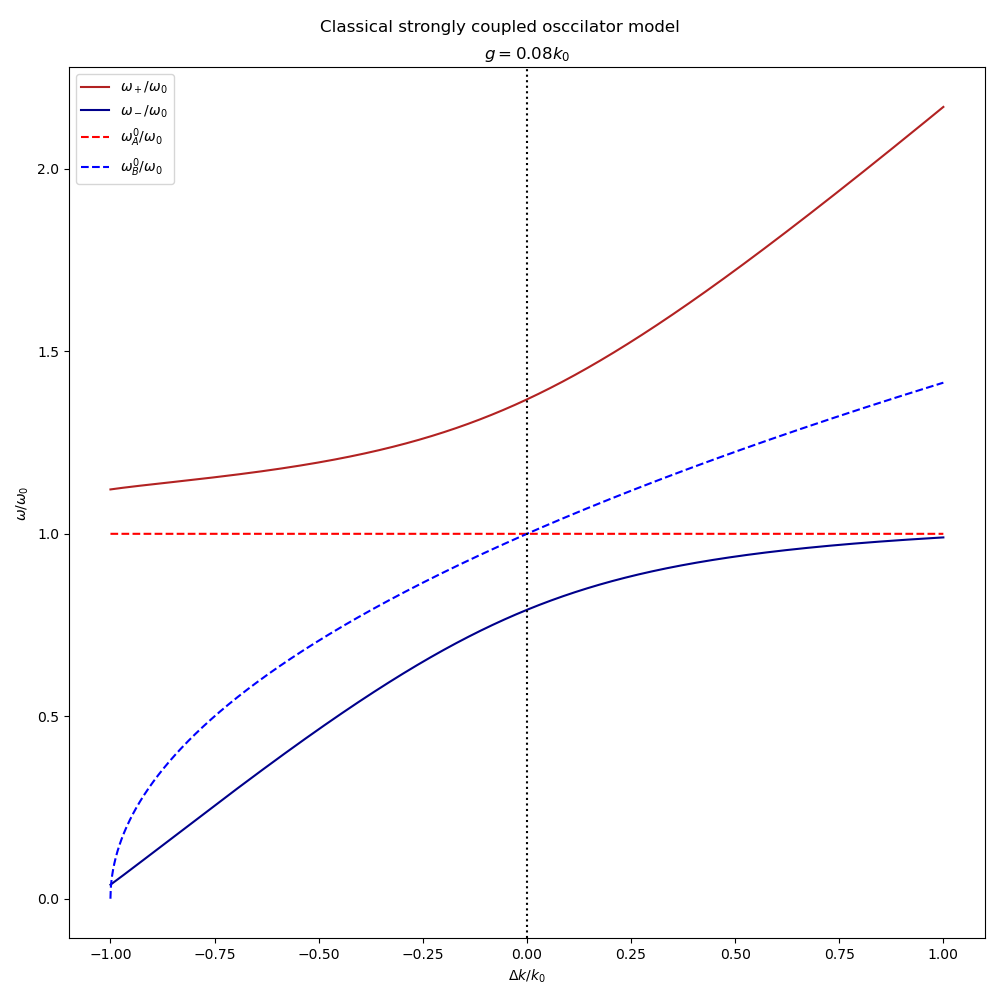

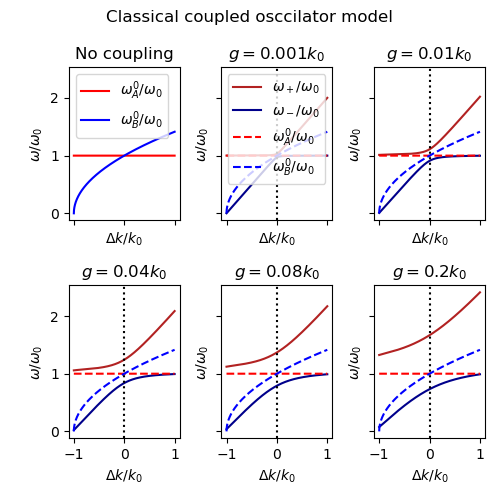

In [14]:
# Fig 1 parameters
k_0  = 1
m_0  = 1
m_A  = m_0
m_B  = m_0
k_A  = k_0
w_0A = np.sqrt(k_A/m_A)
#g    = 0.08*k_0
DK   = np.linspace(-k_0, k_0, 5000)
x    = []
y1A  = []
y1B  = []
y2A  = []
y2B  = []

G = [0.08]
fig, ax = plt.subplots(figsize = (10,10), sharey = True, sharex = True)
fig.suptitle("Classical strongly coupled osccilator model")

Y01 = []
Y02 = []
for dK in DK:
    k_B = k_0+dK
    w_0B = np.sqrt(k_B/m_A)
    x.append(dK/k_0)
    Y01.append(w_0A)
    Y02.append(w_0B)
    

norm = 0
for i,g in enumerate(G):
    Y1 = []
    Y2 = []

    # Calculating data
    for dK in DK:
        k_B = k_0+dK
        #w_0B = np.sqrt(k_B/m_A)
        #x.append(dK/k_0)
        #y1A.append(w_0A)
        #y1B.append(w_0B)
        w_P, w_M = EigenfreqClassic(k_A, k_B, m_A, m_B, g*k_0)
        Y1.append(w_P)
        Y2.append(w_M)
    
    if g == 0:
        ax.plot(x, Y01, color="red", label="$ω^0_A/ω_0$")
        ax.plot(x, Y02, color="blue", label="$ω^0_B/ω_0$")
        ax.set_title("No coupling")
    else:
        ax.plot(x, Y1, color="firebrick", label="$ω_+/ω_0$")
        ax.plot(x, Y2, color="darkblue", label="$ω_-/ω_0$")
        ax.plot(x, Y01, color="red", linestyle="--", label="$ω^0_A/ω_0$" )
        ax.plot(x, Y02, color="blue", linestyle="--", label="$ω^0_B/ω_0$"  )
        ax.set_title(f"$g = {g}k_0$")
        ax.axvline(x=0, color='k', linestyle=':') 
    if i == 0 or i == 1:
        ax.legend()

    ax.set_ylabel('$ω/ω_0$')
    ax.set_xlabel('$Δk/k_0$')
    
plt.tight_layout()


# Fig 1 parameters
k_0  = 1
m_0  = 1
m_A  = m_0
m_B  = m_0
k_A  = k_0
w_0A = np.sqrt(k_A/m_A)
#g    = 0.08*k_0
DK   = np.linspace(-k_0, k_0, 5000)
x    = []
y1A  = []
y1B  = []
y2A  = []
y2B  = []

G = [0, 0.001, 0.01, 0.04, 0.08, 0.2]
fig, ax = plt.subplots(2, 3, figsize = (5,5), sharey = True, sharex = True)
ax = ax.flatten()
fig.suptitle("Classical coupled osccilator model")

Y01 = []
Y02 = []
for dK in DK:
    k_B = k_0+dK
    w_0B = np.sqrt(k_B/m_A)
    x.append(dK/k_0)
    Y01.append(w_0A)
    Y02.append(w_0B)
    

norm = 0
for i,g in enumerate(G):
    Y1 = []
    Y2 = []

    # Calculating data
    for dK in DK:
        k_B = k_0+dK
        #w_0B = np.sqrt(k_B/m_A)
        #x.append(dK/k_0)
        #y1A.append(w_0A)
        #y1B.append(w_0B)
        w_P, w_M = EigenfreqClassic(k_A, k_B, m_A, m_B, g*k_0)
        Y1.append(w_P)
        Y2.append(w_M)
    
    if g == 0:
        ax[i].plot(x, Y01, color="red", label="$ω^0_A/ω_0$")
        ax[i].plot(x, Y02, color="blue", label="$ω^0_B/ω_0$")
        ax[i].set_title("No coupling")
    else:
        ax[i].plot(x, Y1, color="firebrick", label="$ω_+/ω_0$")
        ax[i].plot(x, Y2, color="darkblue", label="$ω_-/ω_0$")
        ax[i].plot(x, Y01, color="red", linestyle="--", label="$ω^0_A/ω_0$" )
        ax[i].plot(x, Y02, color="blue", linestyle="--", label="$ω^0_B/ω_0$"  )
        ax[i].set_title(f"$g = {g}k_0$")
        ax[i].axvline(x=0, color='k', linestyle=':') 
    if i == 0 or i == 1:
        ax[i].legend()

    ax[i].set_ylabel('$ω/ω_0$')
    ax[i].set_xlabel('$Δk/k_0$')
plt.tight_layout()

## Coupled oscilator model for exciton polaritons specifically


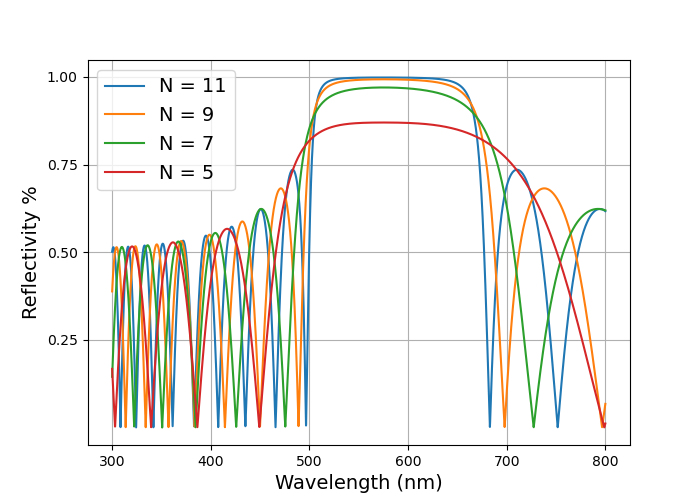

In [17]:
# https://homepages.iitb.ac.in/~shaurya_gupta/images/VCSEL_Report.pdf
n1 = 1.4589 # https://refractiveindex.info/?shelf=main&book=SiO2&page=Malitson
n2 = 2.1339 # https://refractiveindex.info/?shelf=main&book=Ta2O5&page=Bright-amorphous
n3 = 1
n4 = 1
Ns = [11, 9, 7, 5]
Rs = [[],[],[],[],[]]
lo = 575*(10**-9)
for l in np.arange(300*(10**-9), 800*(10**-9), 0.1*(10**-9)):
    for i in range(len(Ns)):
        N = Ns[i]
        r = Rs[i]
        
        k1 = 2*np.pi*n1/l
        d1 = lo/(4*n1)
        p1 = k1*d1

        k2 = 2*np.pi*n2/l
        d2 = lo/(4*n2)
        p2 = k2*d2

        A1 = (n2+n1)/(2*n2)
        A2 = (n2-n1)/(2*n2)
        A3 = (n1+n2)/(2*n1)
        A4 = (n1-n2)/(2*n1)

        D12 = np.array([[A1, A2], [A2, A1]], dtype=complex)
        D21 = np.array([[A3, A4], [A4, A3]], dtype=complex)

        P1 =  np.array([[np.exp(1j*p1), 0],[0, np.exp(-1j*p1)]], dtype=complex)
        P2 =  np.array([[np.exp(1j*p2), 0],[0, np.exp(-1j*p2)]], dtype=complex)

        M = D21@P1@D12@P1
        Mn = np.linalg.matrix_power(M, N)

        # GaN and SiO2
        A3 = (n1+n3)/(2*n3)
        A4 = (n1-n3)/(2*n3)
        D31 = np.array([[A3, A4], [A4, A3]], dtype=complex)
        P1 = np.array([[np.exp(1j*p1), 0],[0, np.exp(-1j*p1)]], dtype=complex)

        #Ta2O5 and air
        A3 = (n2+n4)/(2*n4)
        A4 = (n2-n4)/(2*n4)
        D24 = np.array([[A3, A4], [A4, A3]], dtype=complex)
        Mf = D24@Mn@D31@P1

        r.append(np.abs(Mf[1,0]/Mf[0,0]))
    
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(len(Ns)):
    plt.plot(np.arange(300, 800, 0.1), Rs[i], label=f"N = {Ns[i]}")
plt.legend(fontsize=14)
ax.set_xlabel("Wavelength (nm)", fontsize=14)
ax.set_ylabel("Reflectivity %", fontsize=14)
ax.set_yticks([0.25, 0.5, 0.75, 1])
plt.grid(True)

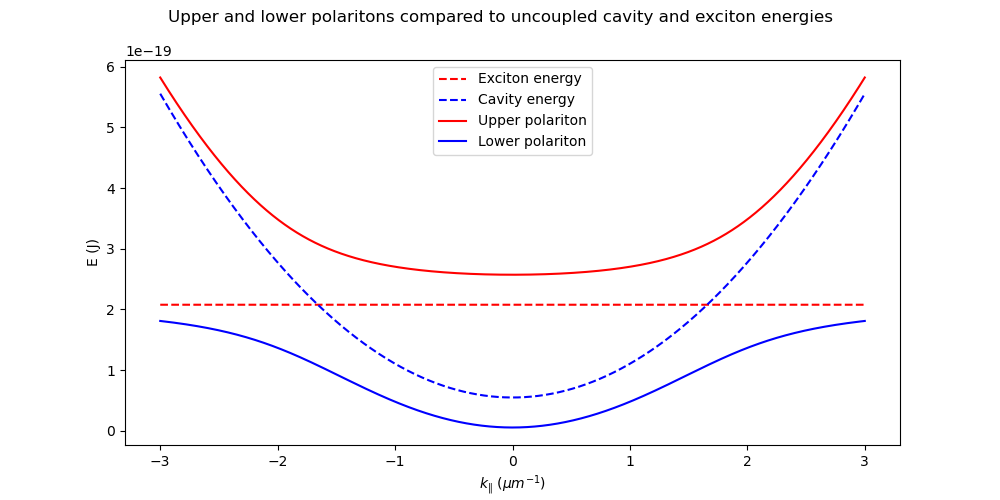

In [20]:
λ_c = 575*10**-9
w_c = sc.c/λ_c
m_cav = 10**-61 # Guess
E_g = 2.17208 # from https://www.nature.com/articles/nature13832.pdf
Ry = 0.09421997117656487 # From curve fit of absorption data

def Cavity_E(k_parallel):
    return ((sc.hbar*k_parallel)**2)/(2*m_cav)+w_c*sc.hbar

def Exciton_E(n):
    return (E_g-Ry/(n**2))*10**-19
2
E = []
C = []
U = []
L = []
Ks = np.linspace(-3*10**-6, 3*10**-6, 10000)
for k in  Ks:
    Eexc = Exciton_E(1)
    Ecav = Cavity_E(k)
    
    C.append(Ecav)
    E.append(Eexc)
    upper, lower = EigenfreqExciton(Eexc, Ecav, 10**-19)
    U.append(upper)
    L.append(lower)
    
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle("Upper and lower polaritons compared to uncoupled cavity and exciton energies")
plt.plot(Ks*10**6, E, label ="Exciton energy", linestyle="--", color="r")
plt.plot(Ks*10**6, C, label="Cavity energy", linestyle="--", color="b")
plt.plot(Ks*10**6, U, label="Upper polariton", color="r")
plt.plot(Ks*10**6, L, label="Lower polariton", color="b")
ax.set_xlabel("$k_‖$ $(μm^{-1})$")
ax.set_ylabel("E (J)")
plt.legend()